In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [57]:
df = pd.read_csv('data_set/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [58]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(df[['Species']])
encoded.shape
y = encoded.ravel() 
y

C:\Users\amil\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [59]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [60]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],y,test_size = 0.03)

In [71]:
x_train

,Weight,Length1,Length2,Length3,Height,Width
157,19.7,13.2,14.3,15.2,2.8728,2.0672
41,110.0,19.1,20.8,23.1,6.1677,3.3957
99,180.0,23.0,25.0,26.5,6.4395,3.6835
7,390.0,27.6,30.0,35.0,12.6700,4.6900
65,150.0,18.4,20.0,22.4,8.8928,3.2928
...,...,...,...,...,...,...
125,1100.0,40.1,43.0,45.5,12.5125,7.4165
82,110.0,19.0,21.0,22.5,5.6925,3.5550
94,150.0,21.0,23.0,24.5,5.2185,3.6260
29,1000.0,33.5,37.0,42.6,18.9570,6.6030


In [64]:
mutal_info = mutual_info_classif(x_train,y_train)
mutal_info

array([0.63914914, 0.73070045, 0.68083968, 0.69896419, 0.76764581,
       0.52424602])

In [69]:
mutual_info = pd.Series(mutal_info)
mutual_info.index = x_train.columns

In [72]:
mutual_info

Weight     0.639149
Length1    0.730700
Length2    0.680840
Length3    0.698964
Height     0.767646
Width      0.524246
dtype: float64

<Axes: >

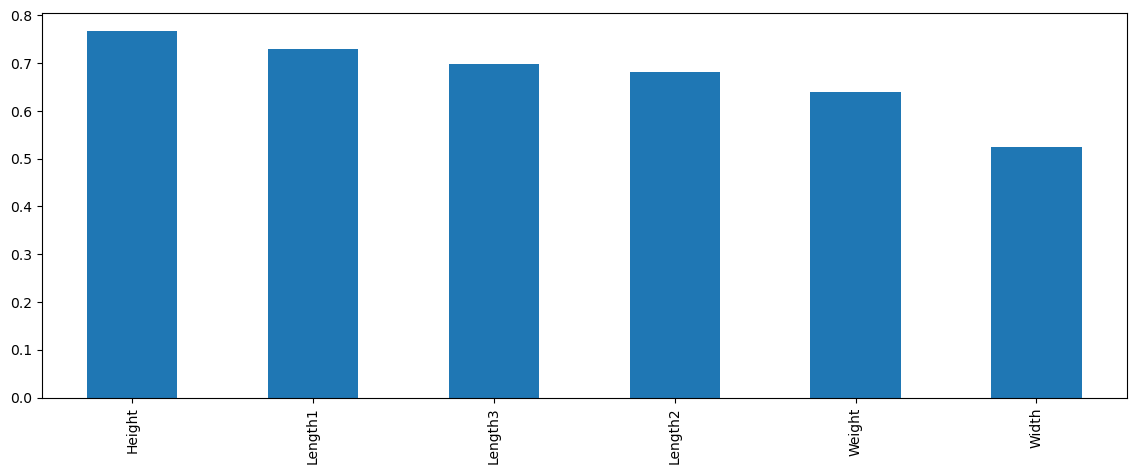

In [76]:
mutual_info.sort_values(ascending = False).plot.bar(figsize= (14,5))